In [13]:
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

In [136]:
PX_SIZE_UM = 1.6

In [114]:
# path = '/Volumes/Multicell/Sebastien/mESC_aggregates/SUMO/23_01_2020/D_5/Chip_1_shapes.csv'
path= '/Volumes/Multicell/Sebastien/mESC_aggregates/SUMO/Cell_number/14022020_SUMO-number/D*/*stats.csv'
paths = sorted(glob(path))
len(paths)

31

In [115]:
import re

r = re.compile(r'D(\d)/(\S*)_stats.csv')
labels = [r.findall(p)[0] for p in paths]

In [116]:
dfs = []
for path, l in zip(paths, labels):
    try:
        df = pd.read_csv(path, index_col=0)
        df['cell_number'] = l[1]
        df['day'] = l[0]
        dfs.append(df)
    except UnicodeDecodeError:
        print(f'bad file {path}')

In [141]:
dfs_all = pd.concat(dfs)
dfs_all['major_axis_length_um'] = dfs_all.major_axis_length * PX_SIZE_UM

In [162]:
dfs_all = dfs_all[dfs_all.cell_number != '300+cond001']
dfs_all

,well_index,area,eccentricity,major_axis_length,cell_number,day,major_axis_length_um
0,0,NaN,NaN,NaN,100+cond,1,NaN
1,1,2649.0,0.762921,72.745863,100+cond,1,116.393380
2,2,2231.0,0.608107,60.303620,100+cond,1,96.485792
3,3,1928.0,0.731825,61.625543,100+cond,1,98.600869
4,4,2483.0,0.845136,77.162176,100+cond,1,123.459481
...,...,...,...,...,...,...,...
53,53,84038.0,0.332671,337.421458,300,7,539.874332
54,54,60710.0,0.405494,291.478914,300,7,466.366262
55,55,1478.0,0.797497,58.008335,300,7,92.813336
56,56,52525.0,0.517165,280.432214,300,7,448.691543


In [139]:
dfs_all.to_csv('/Volumes/Multicell/Sebastien/mESC_aggregates/SUMO/Cell_number/14022020_SUMO-number/stats.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/Multicell/Sebastien/mESC_aggregates/SUMO/Cell_number/14022020_SUMO-number/stats.csv'

In [163]:
cell_nums = dfs_all.cell_number.unique()
cell_nums

array(['100+cond', '100', '200+cond', '200', '300+cond', '300'],
      dtype=object)

In [164]:
days = dfs_all.day.unique()
days

array(['1', '4', '5', '6', '7'], dtype=object)

day 1


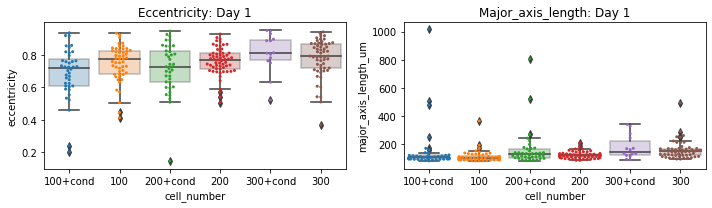

day 4


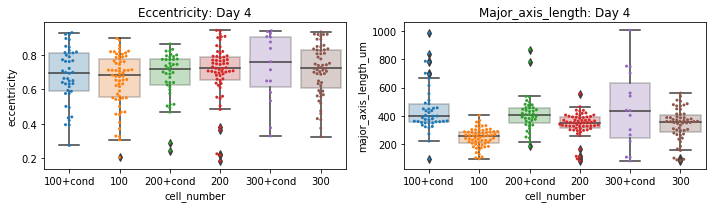

day 5


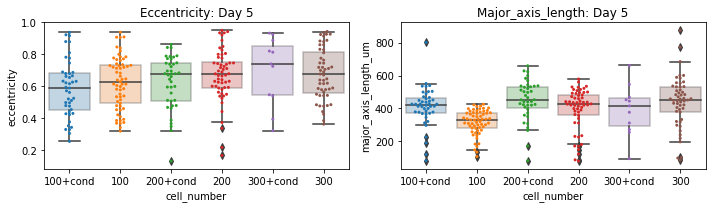

day 6


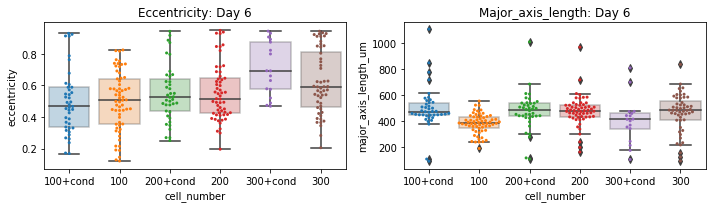

day 7


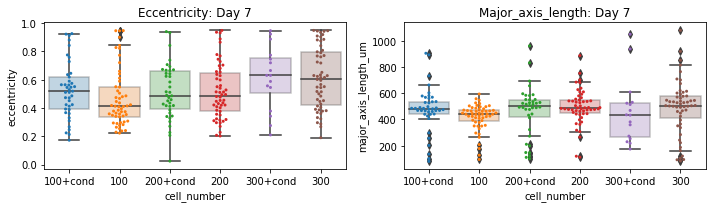

In [165]:
for day in days:
    print(f'day {day}')
    fig, ax = plt.subplots(ncols=2, figsize=(10,3))
    df = dfs_all[dfs_all.day == day]
    sns.swarmplot(data=df, x='cell_number', y='eccentricity', ax=ax[0], size=3)
    sns.boxplot(data=df, x='cell_number', y='eccentricity', boxprops=dict(alpha=.3), ax=ax[0])
    ax[0].set_title(f'Eccentricity: Day {day}')

    sns.swarmplot(data=df, x='cell_number', y='major_axis_length_um', ax=ax[1], size=3)
    sns.boxplot(data=df, x='cell_number', y='major_axis_length_um', boxprops=dict(alpha=.3), ax=ax[1])
    ax[1].set_title(f'Major_axis_length: Day {day}')

    plt.tight_layout()
    plt.show()

cell num 100+cond


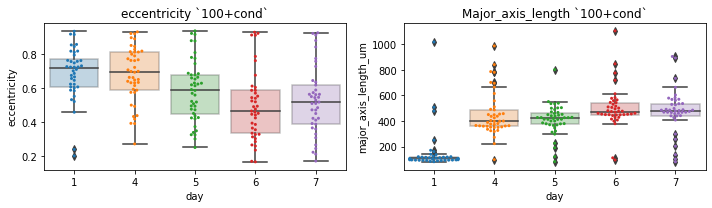

cell num 100


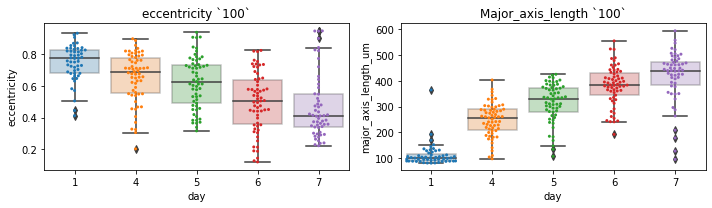

cell num 200+cond


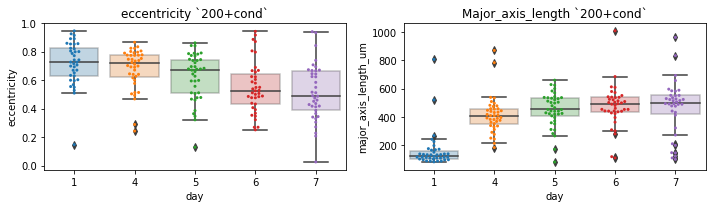

cell num 200


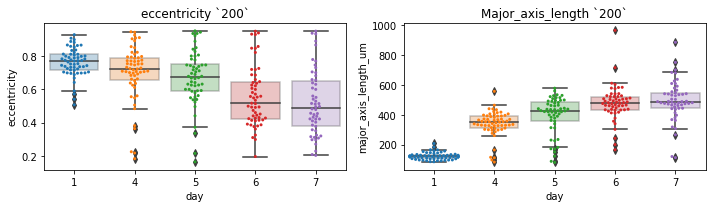

cell num 300+cond


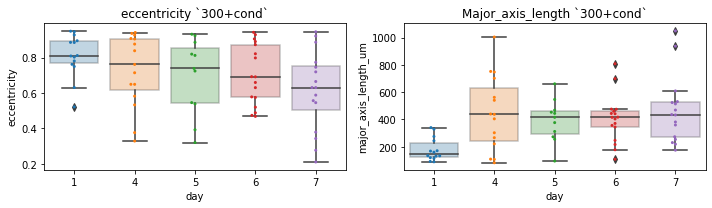

cell num 300


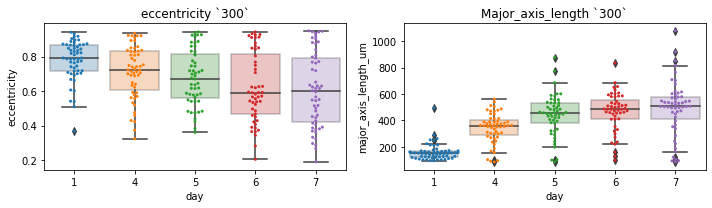

In [166]:
for cell_num in cell_nums:
    print(f'cell num {cell_num}')
    fig, ax = plt.subplots(ncols=2, figsize=(10,3))
    df = dfs_all[dfs_all.cell_number == cell_num]
    sns.swarmplot(data=df, x='day', y='eccentricity', ax=ax[0], size=3)
    sns.boxplot(data=df, x='day', y='eccentricity', boxprops=dict(alpha=.3), ax=ax[0])
    ax[0].set_title(f'eccentricity `{cell_num}`')

    sns.swarmplot(data=df, x='day', y='major_axis_length_um', ax=ax[1], size=3)
    sns.boxplot(data=df, x='day', y='major_axis_length_um', boxprops=dict(alpha=.3), ax=ax[1])
    ax[1].set_title(f'Major_axis_length `{cell_num}`')

    plt.tight_layout()
    plt.show()

Text(0.5, 1.0, 'Major axis length, um')

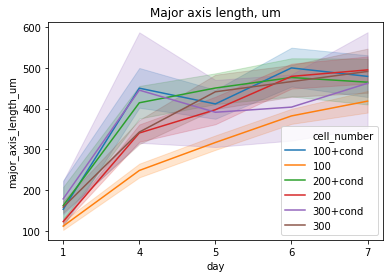

In [167]:
sns.lineplot(x='day', y='major_axis_length_um', hue='cell_number',data=dfs_all)
plt.title('Major axis length, um')

Text(0.5, 1.0, 'Eccentricity')

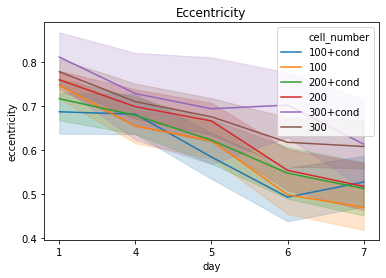

In [168]:
sns.lineplot(x='day', y='eccentricity', hue='cell_number',data=dfs_all)
plt.title('Eccentricity')